## Example Notebook for Usage of FMRay.jl
Daniel Trugman, 2023

In [1]:
### Packages

using FMRay
using PyPlot
using Printf
using StatsBase

### Example 1: Constant Velocity Model

In [2]:
### Basic Usage

# Grid: 2D uniform velocity equal to 1.0, and grid spacing 0.1
h = 0.1
Nx, Ny, Nz = 300, 100, 1
V = 1.0
G = Grid(h, fill(V, (Nx,Ny,Nz)))

# Place source at point indexed (24,36,1), position (23*h, 35*h, 0.0)
source = CartesianIndex(24,36,1)

# calculate travel times to grid
T = march(source, G)

300×100×1 Array{Float64, 3}:
[:, :, 1] =
  4.16378   4.08005   3.99709   3.91497  …   6.60123   6.69542   6.78978
  4.11063   4.02575   3.94161   3.85825      6.56809   6.66274   6.75756
  4.0593    3.97329   3.88797   3.80339      6.5363    6.63141   6.72667
  4.00987   3.92273   3.83625   3.75046      6.5059    6.60145   6.69713
  3.9624    3.87416   3.78653   3.69955      6.47689   6.57286   6.66895
  3.91696   3.82765   3.73889   3.65074  …   6.4493    6.54567   6.64214
  3.87361   3.78325   3.6934    3.6041       6.42313   6.51988   6.61673
  3.83242   3.74105   3.65014   3.55973      6.3984    6.49552   6.59272
  3.79346   3.70111   3.60917   3.51768      6.37513   6.47259   6.57012
  3.75679   3.6635    3.57058   3.47805      6.35331   6.4511    6.54895
  3.72245   3.62827   3.53442   3.44091  …   6.33297   6.43106   6.52921
  3.69052   3.5955    3.50076   3.40632      6.31411   6.41248   6.5109
  3.66102   3.56522   3.46965   3.37434      6.29674   6.39536   6.49403
  ⋮        

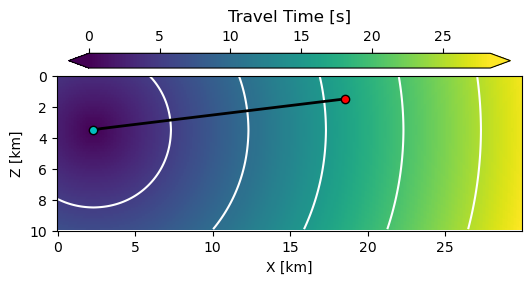

In [3]:
### Plot results

# figure setup
fig, axi = plt.subplots(figsize=(6,5))
axi.set_aspect("equal")

# grid to plot
xg = 0.0:h:(Nx-1)*h
yg = 0.0:h:(Ny-1)*h

# we need to transpose so that X-coord are cols (x-axis)
sc = axi.pcolormesh(xg,yg,transpose(T[:,:,1]))
axi.contour(xg,yg,transpose(T[:,:,1]),colors="w",
     levels=range(0,maximum(T),step=5))

# example ray trace
receiver = (18.5,1.5,0.0)
ray, ind, dh, dv, tanphase = traceray(receiver,source,T,G)
xr = [x[1] for x in ray]
yr = [x[2] for x in ray]
axi.plot(xr,yr,"-k",lw=2)

# plot this
axi.plot(xg[source[1]],yg[source[2]],"co",ms=6,mec="k")
axi.plot(receiver[1],receiver[2],"ro",ms=6,mec="k")

# colorbar
cb = plt.colorbar(sc,pad=0.02,shrink=0.95,aspect=30,extend="both",orientation="horizontal",
    location="top")
cb.ax.set_title("Travel Time [s]")
cb.set_ticks(range(0,maximum(T),step=5))

# clean up
axi.set_xlabel("X [km]")
axi.set_ylabel("Z [km]")
axi.set_ylim(Ny*h,0);

### Example 2: Depth Dependent Velocity Model

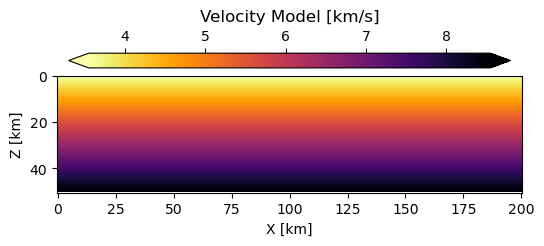

In [4]:
### Depth dependent velocity model

# define grid
h = 0.5
Nx = 401
Ny = 101

# constant depth gradient
Vgrid = zeros((Nx,Ny,1))
for jj in 1:Ny
    z = jj*h
    v = 3.5 + z/10
    Vgrid[:,jj,1] .= v
end

### Plot results

# figure setup
fig, axi = plt.subplots(figsize=(6,5))
axi.set_aspect("equal")

# grid to plot
xg = 0.0:h:(Nx-1)*h
yg = 0.0:h:(Ny-1)*h

# we need to transpose so that X-coord are cols (x-axis)
sc = axi.pcolormesh(xg,yg,transpose(Vgrid[:,:,1]),cmap=plt.cm.inferno_r)

# colorbar
cb = plt.colorbar(sc,pad=0.02,shrink=0.95,aspect=30,extend="both",orientation="horizontal",
    location="top")
cb.ax.set_title("Velocity Model [km/s]")
cb.set_ticks(range(4,8,step=1))

# clean up
axi.set_xlabel("X [km]")
axi.set_ylabel("Z [km]")
axi.set_ylim(Ny*h,0);


In [5]:
### Now Let's Trace Rays

# source position
sourceX = 20.0
sourceZ = 10.0
source = CartesianIndex(1+Int64(sourceX/h), 1+Int64(sourceZ/h), 1)

# receiver coordinates
receiver = (150.0,0.0,0.0)

# Grid
G = Grid(h, Vgrid)

# Travel times
T = march(source,G)

# Ray trace
ray, ind, dh, dv, tanphase = traceray(receiver,source,T,G)

# Done
print("Done with calculations")

Done with calculations

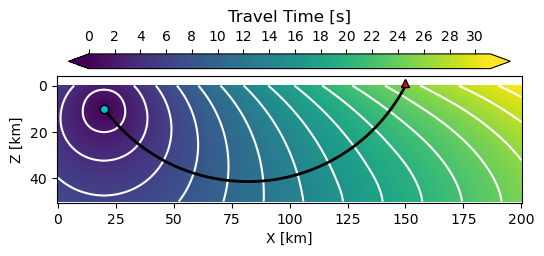

In [6]:
### Plot results

# figure setup
fig, axi = plt.subplots(figsize=(6,5))
axi.set_aspect("equal")

# grid to plot
xg = 0.0:h:(Nx-1)*h
yg = 0.0:h:(Ny-1)*h

# we need to transpose so that X-coord are cols (x-axis)
sc = axi.pcolormesh(xg,yg,transpose(T[:,:,1]))
axi.contour(xg,yg,transpose(T[:,:,1]),colors="w",
     levels=range(0,maximum(T),step=2))

# example ray trace
xr = [x[1] for x in ray]
yr = [x[2] for x in ray]
axi.plot(xr,yr,"-k",lw=2)

# plot this
axi.plot(xg[source[1]],yg[source[2]],"co",ms=6,mec="k")
axi.plot(receiver[1],receiver[2]-1,"r^",ms=6,mec="k") # -1 pad to shift marker bottom to surface

# colorbar
cb = plt.colorbar(sc,pad=0.02,shrink=0.95,aspect=30,extend="both",orientation="horizontal",
    location="top")
cb.ax.set_title("Travel Time [s]")
cb.set_ticks(range(0,maximum(T),step=2))

# clean up
axi.set_xlabel("X [km]")
axi.set_ylabel("Z [km]")
axi.set_ylim(Ny*h,-8*h);

### Example 3: Depth Dependent Velocity Model with Lateral Gradient

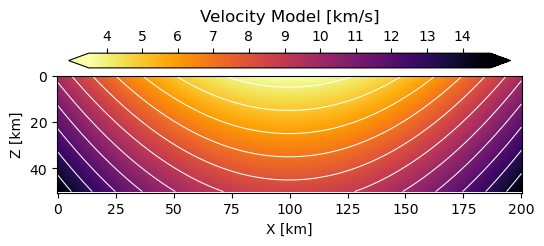

In [7]:
### Depth dependent velocity model with lateral gradient

# define grid
h = 0.5
Nx = 401
Ny = 101
Nz = 1

# constant depth gradient with a radial lateral gradient
Vgrid = zeros((Nx,Ny,1))
for jj in 1:Ny
    z = (jj-1)*h
    for ii in 1:Nx
        x = (ii-1)*h
        v = 3.5 + z/10 + ((ii-Nx/2)*h/40)^2
        Vgrid[ii,jj,1] = v
    end
end

### Plot results

# figure setup
fig, axi = plt.subplots(figsize=(6,5))
axi.set_aspect("equal")

# grid to plot
xg = 0.0:h:(Nx-1)*h
yg = 0.0:h:(Ny-1)*h

# we need to transpose so that X-coord are cols (x-axis)
sc = axi.pcolormesh(xg,yg,transpose(Vgrid[:,:,1]),cmap=plt.cm.inferno_r)
axi.contour(xg,yg,transpose(Vgrid[:,:,1]),colors="w",
     levels=range(4,14,step=1),linewidths=0.75)

# colorbar
cb = plt.colorbar(sc,pad=0.02,shrink=0.95,aspect=30,extend="both",orientation="horizontal",
    location="top")
cb.ax.set_title("Velocity Model [km/s]")
cb.set_ticks(range(4,14,step=1))

# clean up
axi.set_xlabel("X [km]")
axi.set_ylabel("Z [km]")
axi.set_ylim(Ny*h,0);

In [8]:
### Now Let's Trace Rays

# source position
sourceX = 20.0
sourceZ = 10.0
source = CartesianIndex(1+Int64(sourceX/h), 1+Int64(sourceZ/h), 1)

# receiver coordinates
receiver = (150.0,0.0,0.0)

# Grid
G = Grid(h, Vgrid)

# Travel times
T = march(source,G)

# Ray trace
ray, ind, dh, dv, tanphase = traceray(receiver,source,T,G)

# Done
print("Done with calculations")

Done with calculations

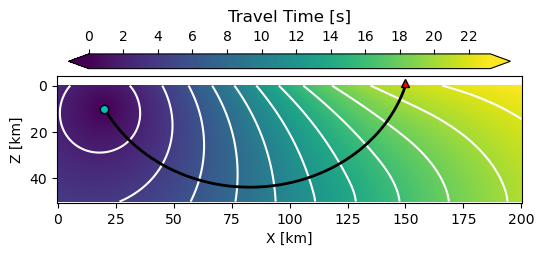

In [9]:
### Plot results

# figure setup
fig, axi = plt.subplots(figsize=(6,5))
axi.set_aspect("equal")

# grid to plot
xg = 0.0:h:(Nx-1)*h
yg = 0.0:h:(Ny-1)*h

# we need to transpose so that X-coord are cols (x-axis)
sc = axi.pcolormesh(xg,yg,transpose(T[:,:,1]))
axi.contour(xg,yg,transpose(T[:,:,1]),colors="w",
     levels=range(0,maximum(T),step=2))

# example ray trace
xr = [x[1] for x in ray]
yr = [x[2] for x in ray]
axi.plot(xr,yr,"-k",lw=2)

# plot this
axi.plot(xg[source[1]],yg[source[2]],"co",ms=6,mec="k")
axi.plot(receiver[1],receiver[2]-1,"r^",ms=6,mec="k") # -1 pad to shift marker bottom to surface

# colorbar
cb = plt.colorbar(sc,pad=0.02,shrink=0.95,aspect=30,extend="both",orientation="horizontal",
    location="top")
cb.ax.set_title("Travel Time [s]")
cb.set_ticks(range(0,maximum(T),step=2))

# clean up
axi.set_xlabel("X [km]")
axi.set_ylabel("Z [km]")
axi.set_ylim(Ny*h,-8*h);

### Example 4: Location Example

In [10]:
### Simple Location example with this velocity model

# station positions - cartesian coordinates
stations = [(5.0,0.0,0.0), (23.0,0.0,0.0), (42.0,0.0,0.0), (143.0,0.0,0.0),
    (76.0,0.0,0.0), (131.0,0.0,0.0),(106.0,0.0,0.0)]

# compute travel grids for each
TT = precomputeT(stations, G)

# earthquake location - cartesian coordinate
quake = (56.0,8.0,0.0)
iquake = getcartindex(quake,G)

# theoretical arrivals
otime = 3.0
arv_theo = [TT[ii][iquake] + otime for ii in eachindex(stations)]

# add some noise
sig = 0.20
arv_obs = arv_theo .+ sig*randn(length(arv_theo))

# location lookup
sigma = sig*ones(length(stations)) # equally weighted uncertainty
x, y, z, t, tcalc = locatelookup(TT, arv_obs, sigma, G, 2) # grid is refined around best location by a factor n=2, 
                                                           # and refined best location is determined based on interpolated arrival times.

# print results
@printf(" True location (X,Z,T) = (%.2f, %.2f, %.2f)\n", quake[1], quake[2], otime)
@printf("FMRay location (X,Z,T) = (%.2f, %.2f, %.2f)", x, y, t)

 True location (X,Z,T) = (56.00, 8.00, 3.00)
FMRay location (X,Z,T) = (56.50, 8.50, 3.06)

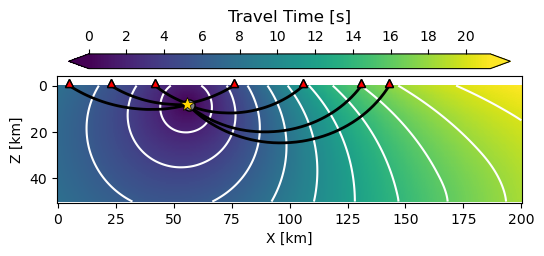

In [11]:
### Plot results

# figure setup
fig, axi = plt.subplots(figsize=(6,5))
axi.set_aspect("equal")

# grid to plot
xg = 0.0:h:(Nx-1)*h
yg = 0.0:h:(Ny-1)*h

# travel time from quake
TQ = march(iquake,G)

# we need to transpose so that X-coord are cols (x-axis)
sc = axi.pcolormesh(xg,yg,transpose(TQ[:,:,1]))
axi.contour(xg,yg,transpose(TQ[:,:,1]),colors="w",
     levels=range(0,maximum(TQ),step=2))

# plot sources and receivers
axi.plot(quake[1],quake[2],"co",ms=6,mec="k")
spad = 1 # to make the stations sit on surface
axi.plot([s[1] for s in stations],[s[2] - spad for s in stations],"r^",ms=6,mec="k")

# ray tracing 
for sta in stations
    ray, ind, dh, dv, tanphase = traceray(sta,iquake,TQ,G)
    xr = [x[1] for x in ray]
    yr = [x[2] for x in ray]
    axi.plot(xr,yr,"-k",lw=2)
end

# plot sources and receivers
axi.plot(x,y,"o",ms=8,color="gray",mec="k") #  inference
axi.plot(quake[1],quake[2],"*",color="gold",ms=10,mec="k",mew=0.5) # true
spad = 1 # to make the stations sit on surface
axi.plot([s[1] for s in stations],[s[2] - spad for s in stations],"r^",ms=6,mec="k")
    
# colorbar
cb = plt.colorbar(sc,pad=0.02,shrink=0.95,aspect=30,extend="both",orientation="horizontal",
    location="top")
cb.ax.set_title("Travel Time [s]")
cb.set_ticks(range(0,maximum(TQ),step=2))

# clean up
axi.set_xlabel("X [km]")
axi.set_ylabel("Z [km]")
axi.set_ylim(Ny*h,-8*h);

